# RandomForest but with Rule (AQ algorithm)

Sample datasets are in the `example_data` folder

## Dataset: `exams_uma.csv`

### Loading the needed libraries

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [27]:
import numpy as np
from core.forest import Forest
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm import tqdm

### Training and testing

In [ ]:
all_stats = []
acc_list = []

data_exams = np.genfromtxt(fname="example_data/exams_uma.csv", delimiter=";", dtype=str)
data_exams = np.unique(data_exams, axis=0)

for _ in range(30):
    training, test = train_test_split(data_exams, test_size=0.2, random_state=0, shuffle=True)
    forest_exams = Forest(n_tree=100, train_x=training[:,:5], train_y=training[:,5:])
    size = test.shape[0]
    score = []
    results = []
    print("Testing...")
    for test_x in tqdm(test[:,:5]):
        result, prec = forest_exams.predict(test_x)
        results.append(result.tolist())
        score.append(prec)

    test_y = test[:,5:]
    fpr, tpr, _ = metrics.roc_curve(test_y, score, pos_label=['1'])

    stats = {}
    stats["acc"] = metrics.accuracy_score(test_y, results)
    stats["precision"] = metrics.precision_score(test_y, results, labels=['1'], average='micro')
    stats["recall"] = metrics.recall_score(test_y, results, labels=['1'], average='micro')
    stats["f1_score"] = metrics.f1_score(test_y, results, labels=['1'], average='micro')
    stats["auc"] = metrics.auc(fpr, tpr)
    stats["fpr"] = fpr
    stats["tpr"] = tpr
    stats["cm"] = metrics.confusion_matrix(test_y,results)

    all_stats.append(stats)
    

In [29]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))


### Result

In [31]:
#mean and std for acc
stats(all_stats, "acc")

(0.6037037037037039, 0.031073115047674117)

In [32]:
#mean and std for precision
stats(all_stats, "precision")

(0.6733652608223542, 0.018360317956451405)

In [33]:
#mean and std for f1_score
stats(all_stats, "f1_score")

(0.7370197768915702, 0.023112775653859743)

In [37]:
#worst and best index by acc
min_v, max_v = get_min_and_max(all_stats, "acc")

In [38]:
all_stats[min_v]

{'acc': 0.5396825396825397,
 'precision': 0.64,
 'recall': 0.7441860465116279,
 'f1_score': 0.6881720430107526,
 'auc': 0.46453488372093027,
 'fpr': array([0.  , 0.  , 0.  , 0.15, 0.15, 0.2 , 0.25, 0.25, 0.3 , 0.35, 0.5 ,
        0.5 , 0.65, 0.75, 0.8 , 0.8 , 0.85, 0.95, 1.  , 1.  , 1.  , 1.  ]),
 'tpr': array([0.        , 0.02325581, 0.09302326, 0.09302326, 0.13953488,
        0.18604651, 0.25581395, 0.3255814 , 0.3255814 , 0.37209302,
        0.48837209, 0.53488372, 0.55813953, 0.60465116, 0.69767442,
        0.74418605, 0.79069767, 0.81395349, 0.86046512, 0.88372093,
        0.97674419, 1.        ]),
 'cm': array([[ 2, 18],
        [11, 32]], dtype=int64)}

In [39]:
all_stats[max_v]

{'acc': 0.6666666666666666,
 'precision': 0.6964285714285714,
 'recall': 0.9069767441860465,
 'f1_score': 0.7878787878787877,
 'auc': 0.5377906976744187,
 'fpr': array([0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.1 , 0.15, 0.15, 0.15, 0.25,
        0.25, 0.3 , 0.4 , 0.4 , 0.5 , 0.5 , 0.7 , 0.7 , 0.75, 0.75, 0.8 ,
        0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 'tpr': array([0.        , 0.02325581, 0.06976744, 0.11627907, 0.13953488,
        0.13953488, 0.18604651, 0.18604651, 0.27906977, 0.30232558,
        0.3255814 , 0.34883721, 0.34883721, 0.39534884, 0.41860465,
        0.46511628, 0.51162791, 0.65116279, 0.69767442, 0.72093023,
        0.81395349, 0.8372093 , 0.88372093, 0.88372093, 0.97674419,
        1.        , 1.        ]),
 'cm': array([[ 3, 17],
        [ 4, 39]], dtype=int64)}

### ROC curve for worst and best result

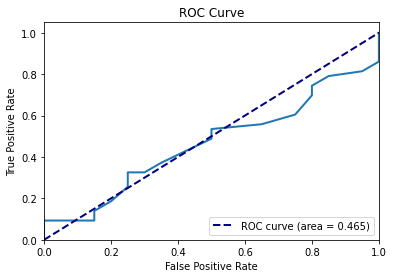

In [40]:
plt.figure()
plt.plot(all_stats[min_v]["fpr"], all_stats[min_v]["tpr"], lw=2)
plt.plot([0, 1], 
             [0, 1], 
             color="navy", 
             lw=2, 
             linestyle="--",
             label="ROC curve (area = %0.3f)" % all_stats[min_v]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

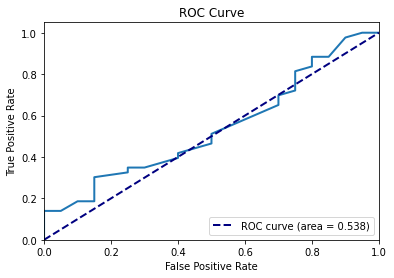

In [41]:
plt.figure()
plt.plot(all_stats[max_v]["fpr"], all_stats[max_v]["tpr"], lw=2)
plt.plot([0, 1], 
             [0, 1], 
             color="navy", 
             lw=2, 
             linestyle="--",
             label="ROC curve (area = %0.3f)" % all_stats[max_v]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### Confusion Matrix for worst and best

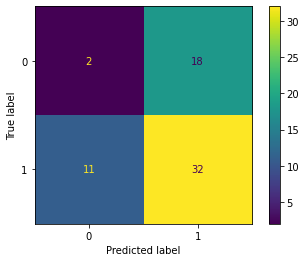

In [42]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v]["cm"])
pcm.plot()
plt.show()

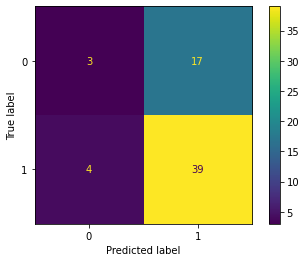

In [43]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v]["cm"])
pcm.plot()
plt.show()